In [1]:
import csv
import math

filename = open('/n/holylabs/LABS/rc_admin/Lab/pedmon/sshare-stats/data/sshare.csv','r')

In [2]:
file = csv.DictReader(filename)

account = []
user = []
rawshares = []
normshares = []
rawusage = []
effectvusage = []
fairshare = []

for col in file:
    account.append(col['Account'])
    user.append(col['User'])
    rawshares.append(col['RawShares'])
    normshares.append(col['NormShares'])
    rawusage.append(col['RawUsage'])
    effectvusage.append(col['EffectvUsage'])
    fairshare.append(col['FairShare'])

In [3]:
fsa = []
fsu = []
acc = []
rua = []
ruu = []
fua = []
rsa = []

totrs = 0
totru = 0

for i in range(len(account)):
    if user[i] == '':
        acc.append(account[i])
        fsa.append(float(fairshare[i]))
        rua.append(float(rawusage[i]))
        rsa.append(float(rawshares[i]))
        totru = float(rawusage[i]) + totru
        totrs = float(rawshares[i]) + totrs
    else:
        fsu.append(float(fairshare[i]))
        ruu.append(float(rawusage[i]))
        
rawushare = (1.0/totrs) * totru

for i in range(len(rua)):
    fua.append((rua[i]/rawushare)/max(rsa[i],1))

rua = [math.log10(max(x,1)/rawushare) for x in rua]
ruu = [math.log10(max(x,1)/rawushare) for x in ruu]
        
print("Number of Accounts:", len(fsa), "Number of Users:", len(fsu), "Total Raw Usage:", totru, "Total Raw Shares:", totrs, "Share to Raw Usage:", rawushare) 

Number of Accounts: 447 Number of Users: 2130 Total Raw Usage: 430999854967.0 Total Raw Shares: 158096.0 Share to Raw Usage: 2726190.7636309583


In [4]:
from matplotlib import pyplot as plt
import numpy as np

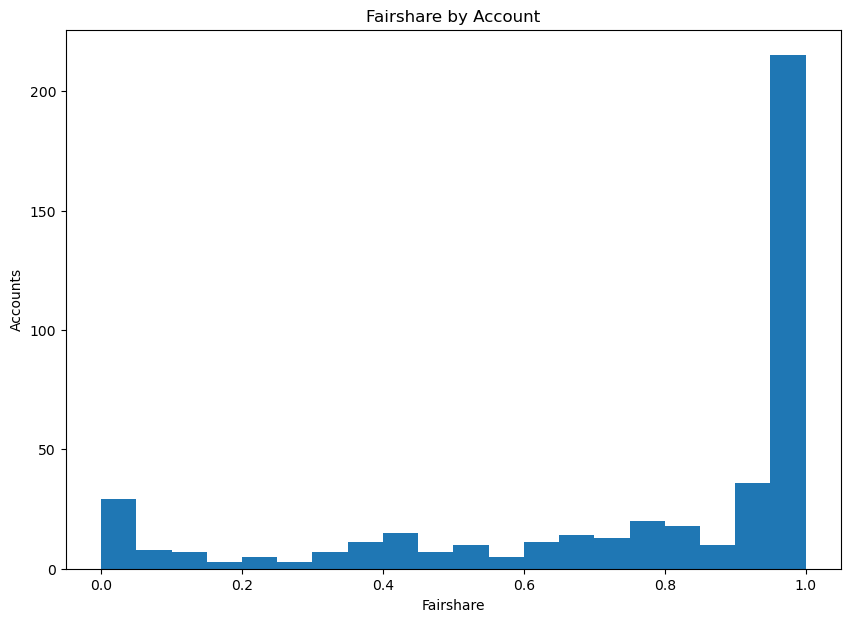

In [5]:
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(fsa, bins = 20)
plt.xlabel("Fairshare")
plt.ylabel("Accounts")
plt.title("Fairshare by Account")

plt.show()

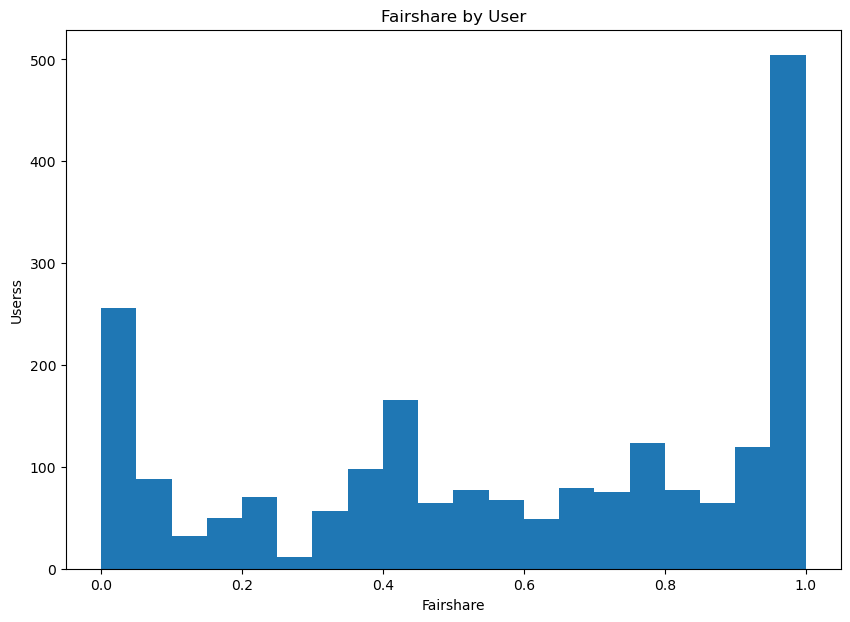

In [6]:
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(fsu, bins = 20)
plt.xlabel("Fairshare")
plt.ylabel("Userss")
plt.title("Fairshare by User")

plt.show()

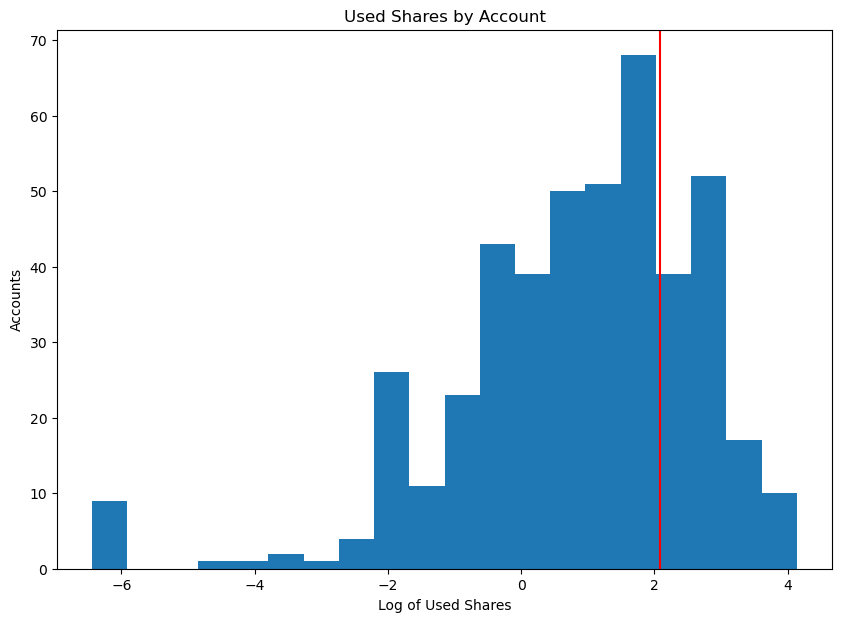

In [7]:
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(rua, bins = 20)
plt.xlabel("Log of Used Shares")
plt.ylabel("Accounts")
plt.title("Used Shares by Account")
plt.axvline(x = 2.079, color = 'r')

plt.show()

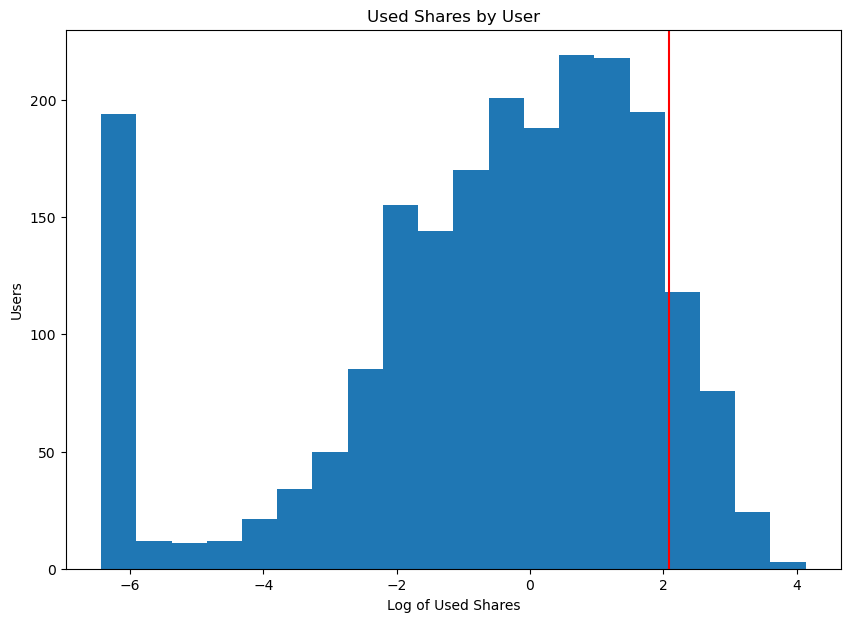

In [8]:
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(ruu, bins = 20)
plt.xlabel("Log of Used Shares")
plt.ylabel("Users")
plt.title("Used Shares by User")
plt.axvline(x = 2.079, color = 'r')

plt.show()

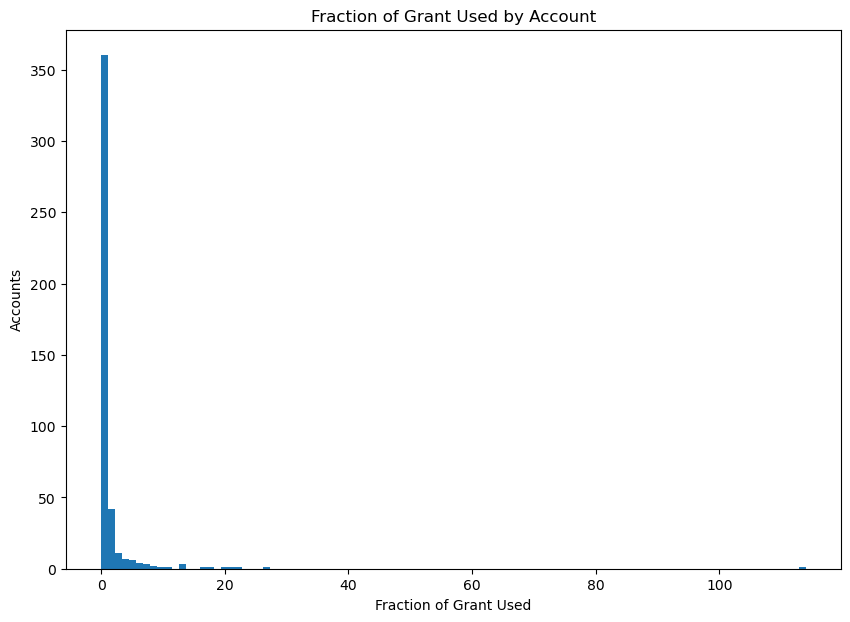

In [9]:
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(fua, bins = 100)
plt.xlabel("Fraction of Grant Used")
plt.ylabel("Accounts")
plt.title("Fraction of Grant Used by Account")

plt.show()

In [10]:
for i in range(len(fua)):
    if fua[i] > 10:
        print(acc[i], fua[i])

duan_lab 22.243906595724297
friend_lab 16.608298502393797
hausmann_lab 13.016158788318076
jbai_lab 17.40591795386071
lakhani_lab 20.414013413552997
lukin_lab 20.840712045225125
pfister_lab 10.103654064207193
randall_lab 12.820849021137965
rush_lab 113.93812111774676
shakhnovich_lab 10.293424617156742
wadduwage_lab 26.725809569892203
yelin_lab 12.751955789537211


In [22]:
accunum = {}
accanum = {}

for i in range(len(account)):
    if user[i] == '':
        accunum.update({account[i]: 0})
    else:
        accunum[account[i]] = accunum[account[i]]+1
            
for i in range(len(account)):
    if user[i] == '':
        accanum.update({account[i]: 0})
    else:
        if float(rawusage[i]) > 120.0/float(accunum[account[i]])*rawushare:
            accanum[account[i]]=accanum[account[i]]+1


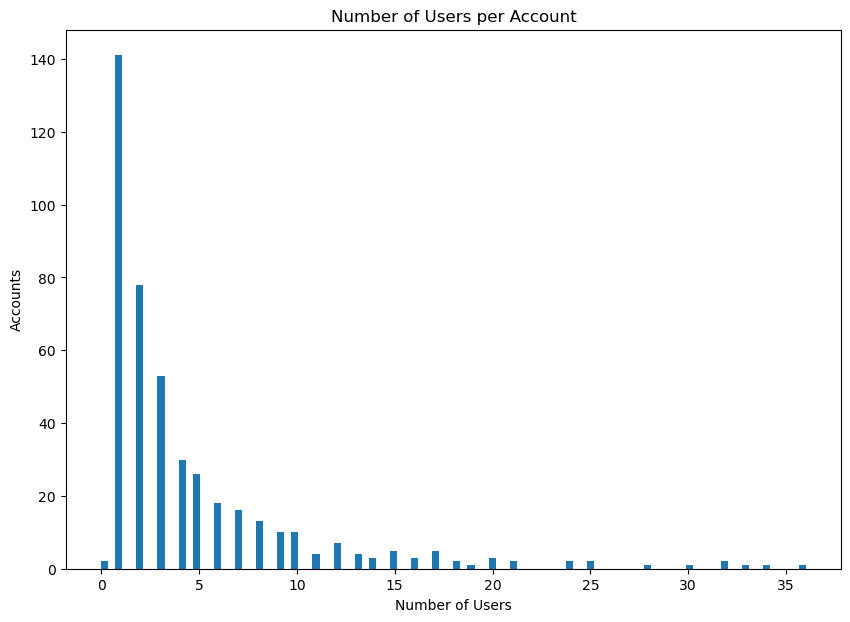

In [28]:
accunuml = []
for key in accunum.keys():
    accunuml.append(accunum[key])
    
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(accunuml, bins = 100)
plt.xlabel("Number of Users")
plt.ylabel("Accounts")
plt.title("Number of Users per Account")

plt.show()

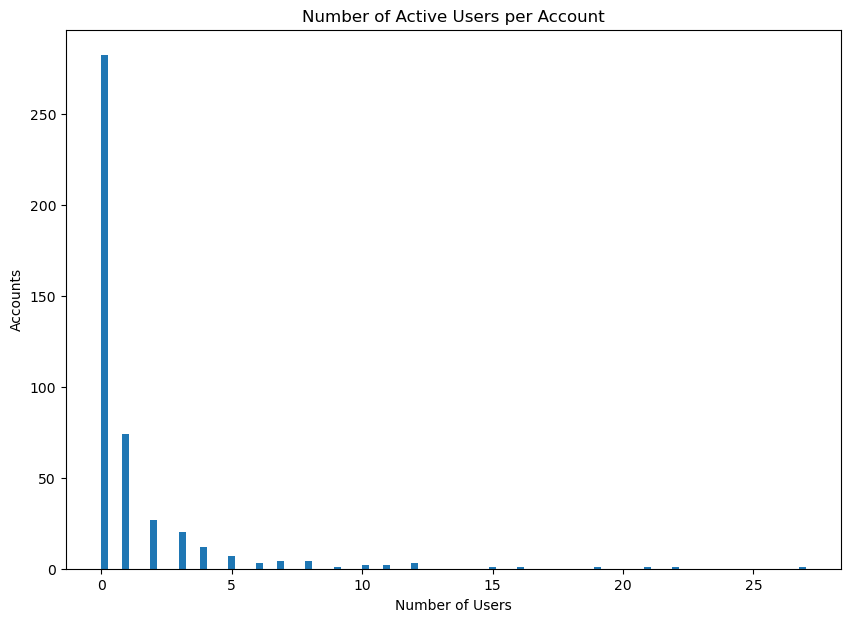

In [29]:
accanuml = []
for key in accanum.keys():
    accanuml.append(accanum[key])
    
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(accanuml, bins = 100)
plt.xlabel("Number of Users")
plt.ylabel("Accounts")
plt.title("Number of Active Users per Account")

plt.show()

In [38]:
ratioau = []

for i in range(len(accanuml)):
    ratioau.append(float(accanuml[i])/max(float(accunuml[i]),1))
    

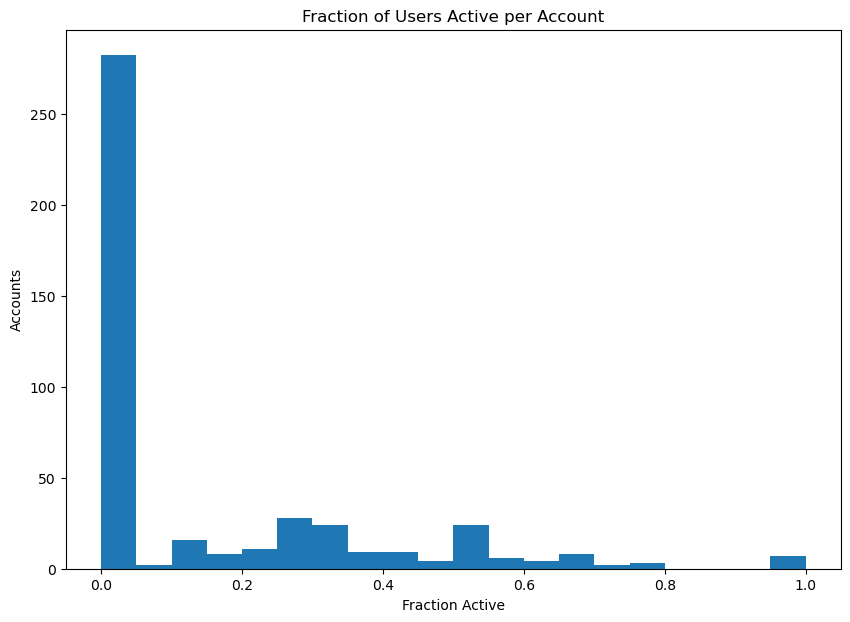

In [37]:
fig, fair = plt.subplots(figsize = (10, 7))
fair.hist(ratioau, bins = 20)
plt.xlabel("Fraction Active")
plt.ylabel("Accounts")
plt.title("Fraction of Users Active per Account")

plt.show()